# Coursework - Data Science Principles and Practices

Name - Venkatesh Nagasubramanian  
URN - 6721597  
e-mail - vn00197@surrey.ac.uk

This notebook contains the coursework of Data Science Principles and Practices. The task of this coursework is to perform classification and validation on the breast cancer dataset, where you classify each cell on whether it is benign or malignant. 

## Import the libraries

Some packages and inbuilt libraries have been used in this coursework to acheive the task. The libraries imported are:
- ***Numpy*** : Numpy is a package that is mainly used to do numerical calculations. This can help create arrays, matrices and make complex arithmetic calculations much easier. 
- ***Pandas*** : Pandas helps us with managing the data, and performing data analysis on the dataset. 
- ***Matplotlib*** : Matplotlib is a data visualisation library. This will help generate bar charts, line charts, etc.
- ***Seaborn*** : Seaborn also is a data visualisation library, but it is a bit advanced and helps create box plots, heatmaps, etc. The ```sns.set()``` command is used to make the charts more attractive.
- ***sci-kit learn*** : The sci-kit learn module, or the sklearn module is used for basic machine learning tasks, we will be using this module for our the models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for the magic in the charts

## Import the dataset

The dataset given to us is the breast cancer dataset. This data is enclosed as a .csv file. The same is imported below using the pandas command, ```pd.read_csv('filename')```

In [2]:
data = pd.read_csv('cancerdata.csv')
data_copy = data # taking a copy of the data just in case
data

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0
...,...,...,...,...,...,...,...,...,...,...
678,2.824082,2.386095,2.295170,2.530536,3.757634,3.025014,1.704320,2.591299,3.199268,0
679,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320,2.591299,3.199268,0
680,4.454847,9.139446,9.221535,4.136366,7.896027,3.656214,8.276563,9.372257,4.526695,1
681,3.639465,7.638702,6.143150,4.939281,3.757634,4.287413,10.154346,6.358498,3.199268,1


## Data Analysis

A general summary of the data is also provided below. Later, the dataset is checked for any null values. However, there were none of them. The correlation between each of the columns is given as a table. As we are only interested in the correlation of the values with the class, we are only plotting the correlation with the class column.

The data contains 9 columns, including the class column where it says whether the cell is benign(0) or malignant(1). 

In [3]:
data.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.349927
std,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,0.477296
min,1.193317,2.386095,2.295170,2.530536,1.688438,2.393815,1.704320,2.591299,3.199268,0.000000
25%,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0.000000
50%,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0.000000
75%,5.270230,5.387585,5.373554,4.939281,4.792233,5.549811,5.459887,4.851618,3.199268,1.000000
max,8.531761,9.139446,9.221535,9.756771,10.999821,8.074609,10.154346,9.372257,15.146119,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB


In [5]:
data['Class'].sum() # Shows the number of malignant cases in the data

239

The ```df.corr()``` outputs the correlation between two columns as a table shown below. The correlation method here is the Pearson correlation method.

In [6]:
data.corr(method='pearson')

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Cl.thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Cell.size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Cell.shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marg.adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Epith.c.size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare.nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bl.cromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal.nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


Let's visualise all that wildly cramped data. We will only be interested in the correlation between all the features and the class column. The bar chart of the correlations with respect to the class are shown below. The columns ***Cell.Size, Cell.Shape*** and ***Bare.Nuclei*** have high correlation with the Class and ***Mitoses*** has the minimum correlation of just 0.42.

Text(0, 0.5, 'Correlation with Class')

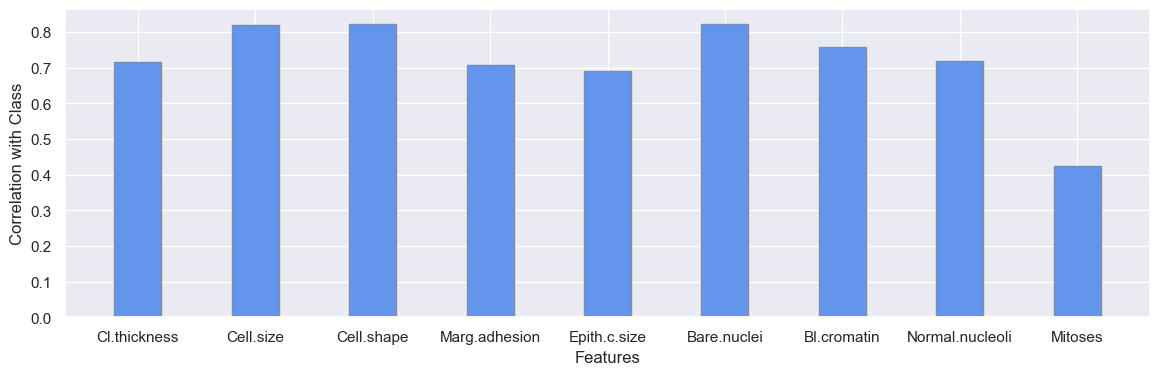

In [7]:
plt.figure(figsize = (14,4))
plt.bar(data.columns[:-1], data.corr(method='pearson')['Class'][:-1], color = 'cornflowerblue', edgecolor = '#7f8e9e', width = 0.4)
plt.xlabel('Features')
plt.ylabel('Correlation with Class')

Should we drop the mitoses column then? Yes and No. Usually we drop a feature if it has a lower correlation coefficient. This helps the algorithm run faster and make the model less expensive computationally.   
The main point of feature engineering, although, is to improve accuracy.  
This model does not require huge computation to perform, hence we wouldn't be dropping this column.

## Scaling the data 

The data is sent to be scaled to a number between 0 and 1. This is done so that the compiler learns faster and easier. Here, I will be using the min, max scaler. The box plots of before and after the scaling are given below.

How does this scaler work?  
The min-max scaler uses minimum and maximum values of the dataset to scale the values. The difference between a datapoint and the minimum is divided by the maximum difference in the column.

This way, the values are equally spaced and standardised between the minimum value being zero and the maximum value being one. 

But before that, we split the values between the features and the target values or ```x``` and ```y```.

In [8]:
# Split into features and columns

y = data['Class']
x = data[data.columns[:-1]]


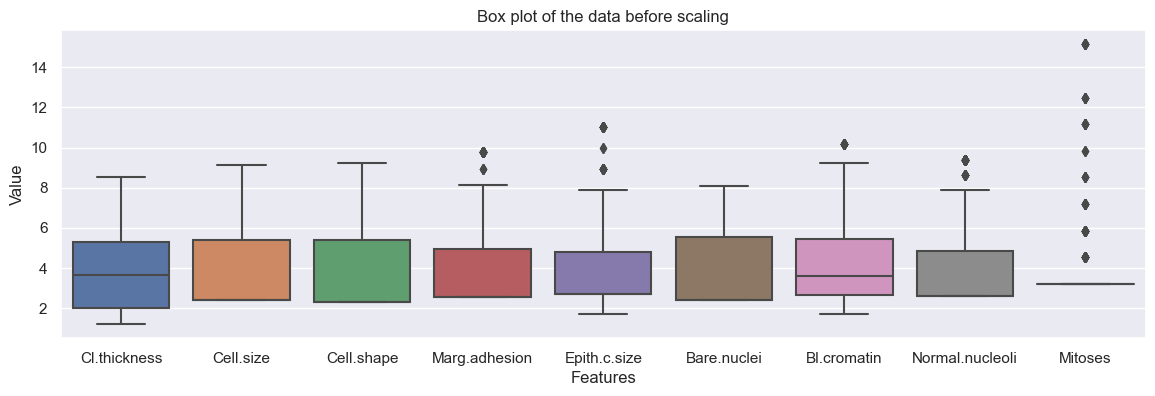

In [9]:
# Box plot of the data before scaling 

plt.figure(figsize = (14,4))
sns.boxplot(data = x)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box plot of the data before scaling')
plt.show()

In [10]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


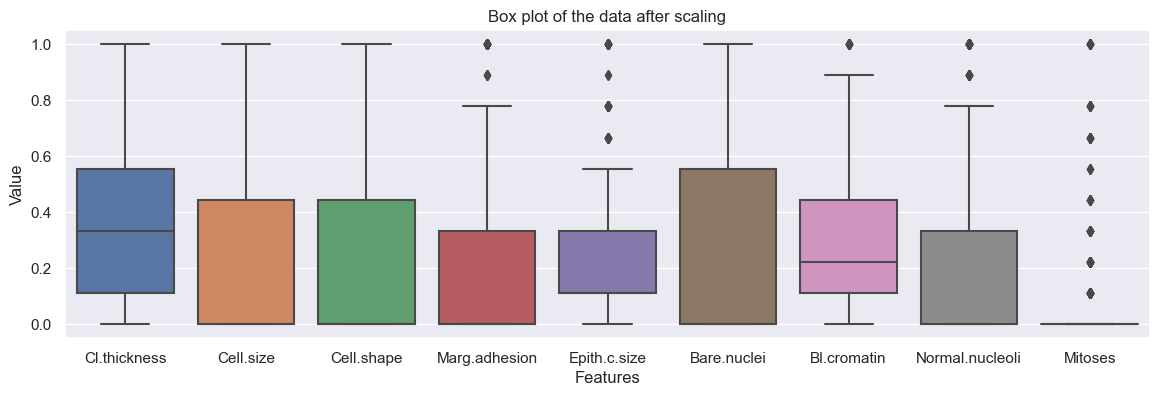

In [11]:
# Box plot of the data after the scaling

x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns = list(data.columns[:-1])
plt.figure(figsize = (14,4))
sns.boxplot(data = x_scaled)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Box plot of the data after scaling')
plt.show()

## Model

Now that we have scaled the data, we can continue with the model. We will be performing two classifier models:
1. Naive Bayes
2. Logistic Regression model

More on these models will be explained later.

Before this, the data will be split into two parts - one training set to train the model, and a testing set used to check the performance of the model. For this there is an inbuilt function in sklearn. The split between the data is 75-25. The random state parameter is also specified, so I could get the same answer with different runs of the code. It is specified as 57 because it is my lucky number!

In [12]:
# Split the data 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 57)
0.75*683

512.25

In [13]:
print(x_train.shape, x_test.shape)

(512, 9) (171, 9)


### Naive Bayes model

This classifier technique determines the probability using Baye's Theorem. This approach is "naive" because it believes that the features are distinct from one another—that is, that the presence or absence of one feature has no bearing on another. There are many other kinds of Naive Bayes classifiers, but we'll choose the Gaussian variety because it can handle continuous data.

One assumption that is inherent in the Gassian Naive Bayes classification is that, the data is distributed normally. So the likelihood of the class is determined assuming that the features are normally distributed and are independent of each other.

This model calculates the class by calculating two probabilities. Let me explain this in our context:

Firstly, calculate the probability that it is benign, given the features. Let us call it P(0|x). Then, calculate the probability that it is malignant given the same features or simply P(1|x). The prediction will be that class for which the probability is higher. That is, if P(0|x) > P(1|x), it is 0 or else 1.

The Naive Bayes is implemented using the sklearn package, ```sklearn.naive_bayes.GaussianNB```.

In [14]:
# define the model

from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)

GaussianNB()

In [15]:
# making the predictions
y_pred_bayes = bayes_model.predict(x_test)
y_pred_bayes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [16]:
bayes_model.score(x_test,y_test) # outputs the accuracy

0.9590643274853801

### Logistic Regression model
It is one of the most basic method to classify data. This method takes features and target and outputs a value between 0 and 1. This is the probability of the class. Usually if the model outputs greater than 0.5 for a particular feature, it is assumed as Class 1 or 0 otherwise.

Logistic Regression can be mathematically stated as:

y = 1/(1 + e^(w*x +b)) or in simpler terms, y = sigmoid(w*x + b)

where x and y are the features and the target respectively, and w is the weight(s) and b is the bias. 

In [17]:
# define the model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
# making the predictions
y_pred_log = log_model.predict(x_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [19]:
log_model.score(x_test,y_test) # outputs the accuracy

0.9707602339181286

## Validation

We've fit the data to both the models and we saw that we have got more than 95% accuracy on both the models. But this is because we have taken only one particular set of data to train and one particular set of data to test. The results might differ if we had probably taken a different set of data for the testing and training set. 

We can acheive this using cross-validation techniques. We will be using k fold cross validation. But the disadvantage is that we might have imbalanced classes. You can see that there is only 239 malignant cases and 444 benign ones (check line 5). That's 1.85 benign cases for 1 malignant class. There is chance that there is a high imbalance when the algorithm splits the data.

Stratified cross validation takes care of that. 

How does cross validation work? The algorithm splits the data into k parts(or folds). One part will be used for the testing and the rest for the training. So the algorithm iterates this process k times for each part used for testing. To honour our splitting before, we will make sure the split is the same, i.e, 75-25. So the number of folds is 4.

As always, we will lean on sklearn for this.

In [20]:
# creating the cross validation function to return scores

from sklearn.model_selection import StratifiedKFold, cross_validate
def cross_validation(model, X, Y):
    strat = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 57)
    scores = cross_validate(model, X, Y, cv = strat, return_train_score = True, scoring = ['accuracy', 'precision', 'recall', 'f1'])
    
    return scores

In [21]:
# fit the naive bayes model and output the scores
val_bayes = cross_validation(bayes_model, x_scaled, y)
test_score_bayes, train_score_bayes = val_bayes['test_accuracy'], val_bayes['train_accuracy']
val_bayes

{'fit_time': array([0.00224924, 0.0009973 , 0.00099659, 0.00099611]),
 'score_time': array([0.00322175, 0.00199294, 0.00201964, 0.00199342]),
 'test_accuracy': array([0.97660819, 0.95321637, 0.94736842, 0.97647059]),
 'train_accuracy': array([0.95898438, 0.96289062, 0.97070312, 0.95906433]),
 'test_precision': array([0.9375    , 0.93333333, 0.88059701, 0.93650794]),
 'train_precision': array([0.91578947, 0.91666667, 0.94086022, 0.91623037]),
 'test_recall': array([1.        , 0.93333333, 0.98333333, 1.        ]),
 'train_recall': array([0.97206704, 0.98324022, 0.97765363, 0.97222222]),
 'test_f1': array([0.96774194, 0.93333333, 0.92913386, 0.96721311]),
 'train_f1': array([0.94308943, 0.94878706, 0.95890411, 0.94339623])}

In [22]:
# fit the logistic Regression model and output the scores
val_log= cross_validation(log_model, x_scaled, y)
test_score_log, train_score_log = val_log['test_accuracy'], val_log['train_accuracy']
val_log

{'fit_time': array([0.00314951, 0.00240707, 0.00303602, 0.00298953]),
 'score_time': array([0.00250101, 0.00220394, 0.00103998, 0.00199366]),
 'test_accuracy': array([0.97076023, 0.96491228, 0.96491228, 0.97647059]),
 'train_accuracy': array([0.97070312, 0.97070312, 0.97070312, 0.96881092]),
 'test_precision': array([0.96610169, 0.98214286, 0.93548387, 0.96610169]),
 'train_precision': array([0.96590909, 0.96067416, 0.96590909, 0.96067416]),
 'test_recall': array([0.95      , 0.91666667, 0.96666667, 0.96610169]),
 'train_recall': array([0.94972067, 0.95530726, 0.94972067, 0.95      ]),
 'test_f1': array([0.95798319, 0.94827586, 0.95081967, 0.96610169]),
 'train_f1': array([0.95774648, 0.95798319, 0.95774648, 0.95530726])}

That is too many numbers to comprehend. Don't worry, we will be visualising them later.

In [23]:
# define a function to check the training and testing accuracy of the models

def visualise(train, test, title):
    x_axis = np.arange(4)
    plt.figure(figsize = (10,4))
    plt.bar(x_axis , test, label = 'Testing accuracy', width = 0.2, color = '#2ab7ca')
    plt.bar(x_axis + 0.2, train, label = 'Training accuracy', width = 0.2, color = '#fed766')
    plt.xticks(x_axis, ['B1', 'B2', 'B3', 'B4']) # the B stands for batch
    plt.xlabel('Batches')
    plt.ylabel('Value')
    plt.legend()
    plt.title(title)
    plt.show()

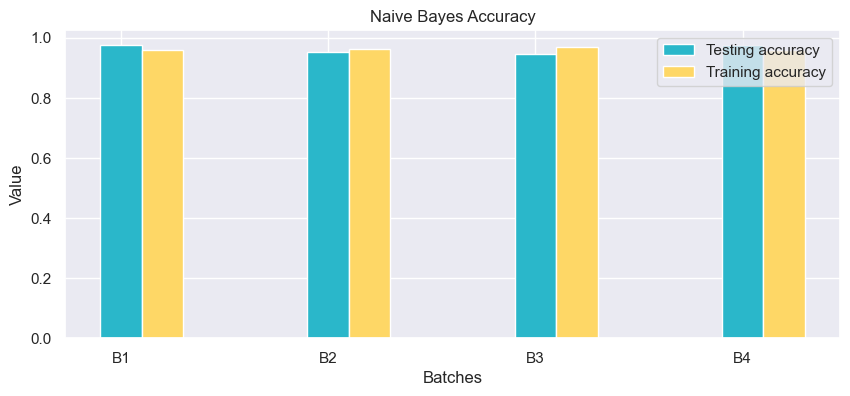

In [24]:
# visualise the data for the naive bayes model

visualise(train_score_bayes, test_score_bayes, 'Naive Bayes Accuracy')

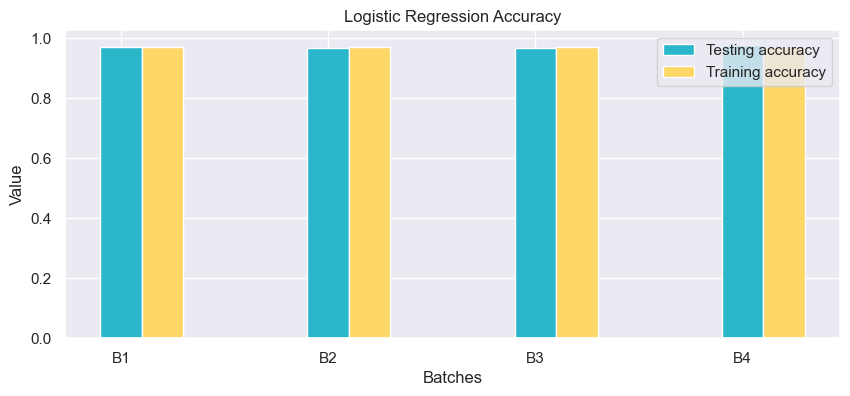

In [25]:
# visualise the data for the logistic regression model

visualise(train_score_log, test_score_log, 'Logistic Regression Accuracy')

One of the common enemies of a mahcine learning model is the possibility of overfitting. Seeing the graphs of the training vs the testing accuracy of both the models seem to be almost similar. So we can conclude that the models aren't overfitting. 

### Model Evaluation  

Let's examine the model's performance now that it has been constructed. Although both models' accuracy is listed after the model itself, this is insufficient. For this binary classification, we'll employ additional validation techniques.

There are four possible outcomes when a binary classification model makes a prediction:  
```
| Actual/Predicted | 1 (Positive)   | 0 (Negative)   |  Horizontal is Actual  
|:-----------------|:--------------:|:--------------:|  Vertical is Predicted  
| 1                | True Positive  | False positive |  
| 0                | False negative | True negative  |  
```

The above table is also called as the confusion matrix. 

Now that we know about the outcomes, lets look at the validation metrics of the model:  
- ***Accuracy*** : The proportion of accurate predictions to all predictions. It is mathematically written as accuracy = (tp + tn) / (tp + tn + fp + fn)
- ***Precision*** : The proportion of true positives to all predicted positive outcomes. It is mathematically represented as precision = tp / (tp + fp)
- ***Recall*** : This is the proportion of the true positives by the overall amount of actual positive values. Mathematically, recall = tp / (tp + fn)
- ***F1 score*** : The harmonic mean of the precision and recall. Or mathematically, F1 score = 2 / (1 / precision + 1 / recall) or 2 * precision * recall / (precison + recall)

How do we comapare these numbers? Usually, a better accuracy, precision, recall and f1 score means a better performing model, although the direct result inferred is different for all of them. For example better precision means lesser false positives, which obviously implies the model is doing better.


To quickly output all of them, there are specialised packages in the ```sklearn.metrics``` library. To obtain all of these values, we will write a function, which we will then visualise to compare the two models. For the cross-validation technique, we already have the values.
Note that both the ```sklearn.metrics.score``` and ```sklearn.metrics.accuracy_score```  give out the same value.

We will first calculate the metrics for the initial split. We have already calculated for the cross validation split, but it will be visualised later.

In [26]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
# create a function to output scores

def scores(y,y_hat):
    acc = accuracy_score(y,y_hat)
    pre = precision_score(y,y_hat)
    rec = recall_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    dic = {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1 score': f1}
    return dic


Let's calculate the validation metrics for the Naive Bayes classifier model

In [27]:
bayes_metrics = scores(y_test, y_pred_bayes)
bayes_metrics

{'accuracy': 0.9590643274853801,
 'precision': 0.9180327868852459,
 'recall': 0.9655172413793104,
 'f1 score': 0.9411764705882353}

Now, for the Logistic Regression model

In [28]:
log_metrics = scores(y_test, y_pred_log)
log_metrics

{'accuracy': 0.9707602339181286,
 'precision': 0.9649122807017544,
 'recall': 0.9482758620689655,
 'f1 score': 0.9565217391304347}

Now that we've got the values, we shall visualise all of them to see which model performs better.

In [29]:
# define a function to output the graph
def compare_graph(bayes_values, log_values, title):
    X_axis = np.arange(4)
    plt.figure(figsize = (10,4))
    plt.bar(X_axis , bayes_values, label = 'Naive bayes classifier', width = 0.2, color = '#ff6f69')
    plt.bar(X_axis + 0.2, log_values, label = 'Logistic Regression classifier', width = 0.2, color = '#88d8b0')

    plt.xticks(X_axis, ['accuracy', 'precision', 'recall', 'f1 score'])
    plt.xlabel('Validation Metrics')
    plt.ylabel('Value')
    plt.legend()
    plt.title(title)
    plt.show()

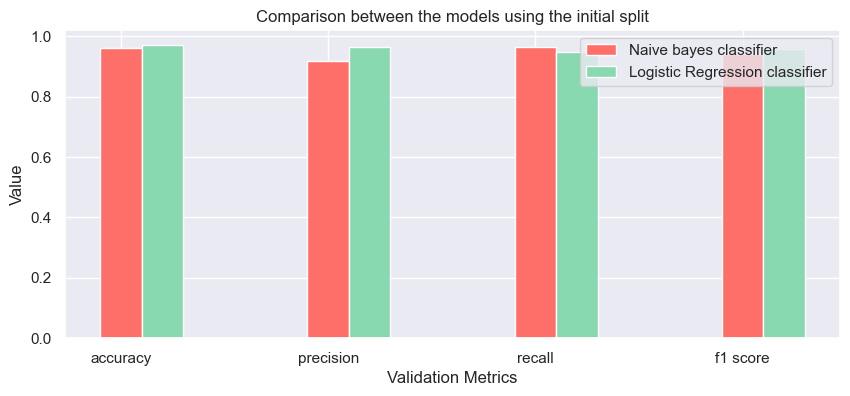

In [30]:
compare_graph(bayes_metrics.values(), log_metrics.values(), 'Comparison between the models using the initial split')

As you can see, the Logistic Regression model has better precision, and a slightly better f1 score and accuracy. The Naive Bayes has done a slightly better job in terms of recall. 

Now, Let's calculate for the models but using the 4-fold cross validation split method. We will be using the average of the metrics to decide the performance of the model.

In [31]:
# create a function to output the KFold metrics
def KFold_metrics(vals):
    metrics = {}
    
    acc, pre, rec, f1 = [], [], [], [] 
    
    acc.append(vals['test_accuracy'])
    pre.append(vals['test_precision'])
    rec.append(vals['test_recall'])
    f1.append(vals['test_f1'])
        
    metrics['accuracy'], metrics['precision'] = np.mean(acc), np.mean(pre)
    metrics['recall'], metrics['f1 score'] = np.mean(rec), np.mean(f1)
    
    return metrics
    

In [32]:
# KFold metrics for the Naive Bayes model
bayes_kfold_metrics = KFold_metrics(val_bayes)
bayes_kfold_metrics

{'accuracy': 0.9634158926728587,
 'precision': 0.9219845711916608,
 'recall': 0.9791666666666666,
 'f1 score': 0.9493555604597548}

In [33]:
# KFold metrics for the Logistic Regression model
log_kfold_metrics = KFold_metrics(val_log)
log_kfold_metrics

{'accuracy': 0.9692638458892329,
 'precision': 0.9624575294852769,
 'recall': 0.949858757062147,
 'f1 score': 0.9557951055981696}

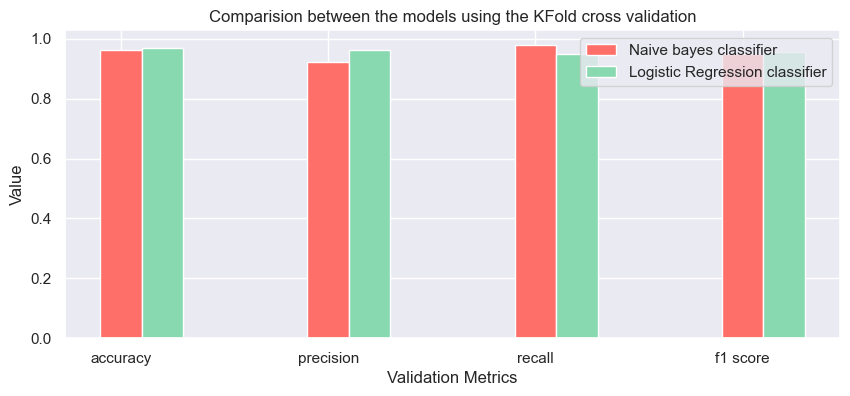

In [34]:
compare_graph(bayes_kfold_metrics.values(), log_kfold_metrics.values(), 'Comparision between the models using the KFold cross validation')

Hmm, same result. Naive Bayes has the better recall, and the rest of them is dominated by the logistic regression. 

## Conclusion

What do we see from implementing both the models?  

Our Logistic Regression model has performed better in 3 out of 4 metrics against Gaussian Naive Bayes model, both in the initial split as well as the cross validation. So Logistic Regression is better than Naive Bayes?

#### NO 

No model is absolutely better than another one. This is specific to only this dataset, a different dataset might have given us a different result.  

We must also remember to consider the goal of all this. Other than attempting for 30% marks of the module, the end goal of building this model might be to reduce the falsely predicted malignant cells. If that was the case, then the Naive Bayes has performed well. If the end goal was to have lesser false predictions overall, then the Logistic Regression takes the win. 

So to conclude, it all depends on the end goal that we are pursuing.

### Future work

There is more analysis that we could do for the dataset, like checking the duplicate rows in the dataset, etc. This might challenge the model and the accuracy would probably decrease. 

There are also more methods to detect which column is better suited for the classification. If you see the correlation table, some features have over 75% correlation amongst themselves. More research is needed to see if we could drop any of those columns to get better results.

------------------------------- THE END -------------------------------